Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of rows (instances): 17000
Number of columns (variables): 9
-------------------------------------------------------------------------------------------
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       5

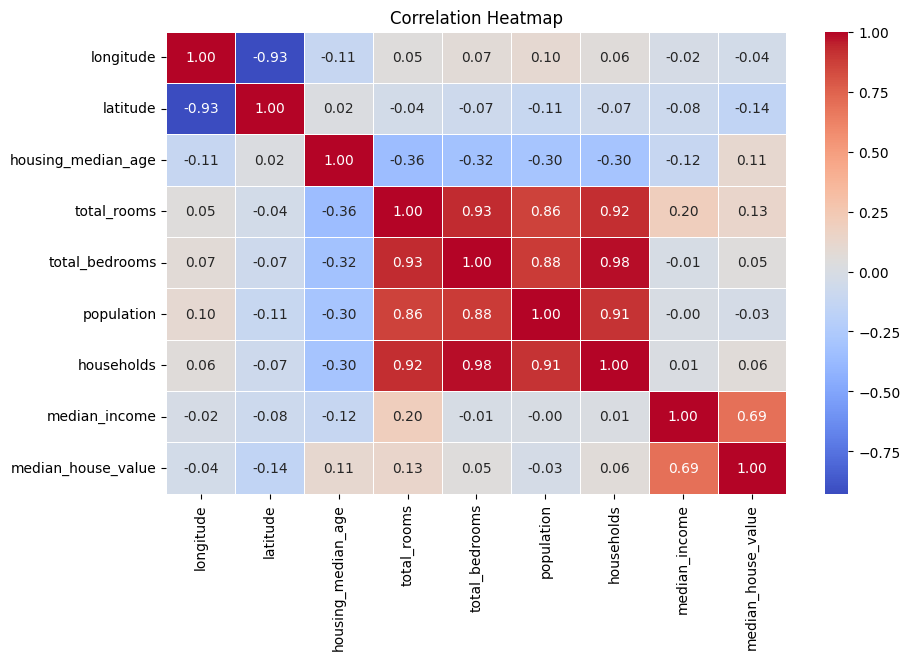

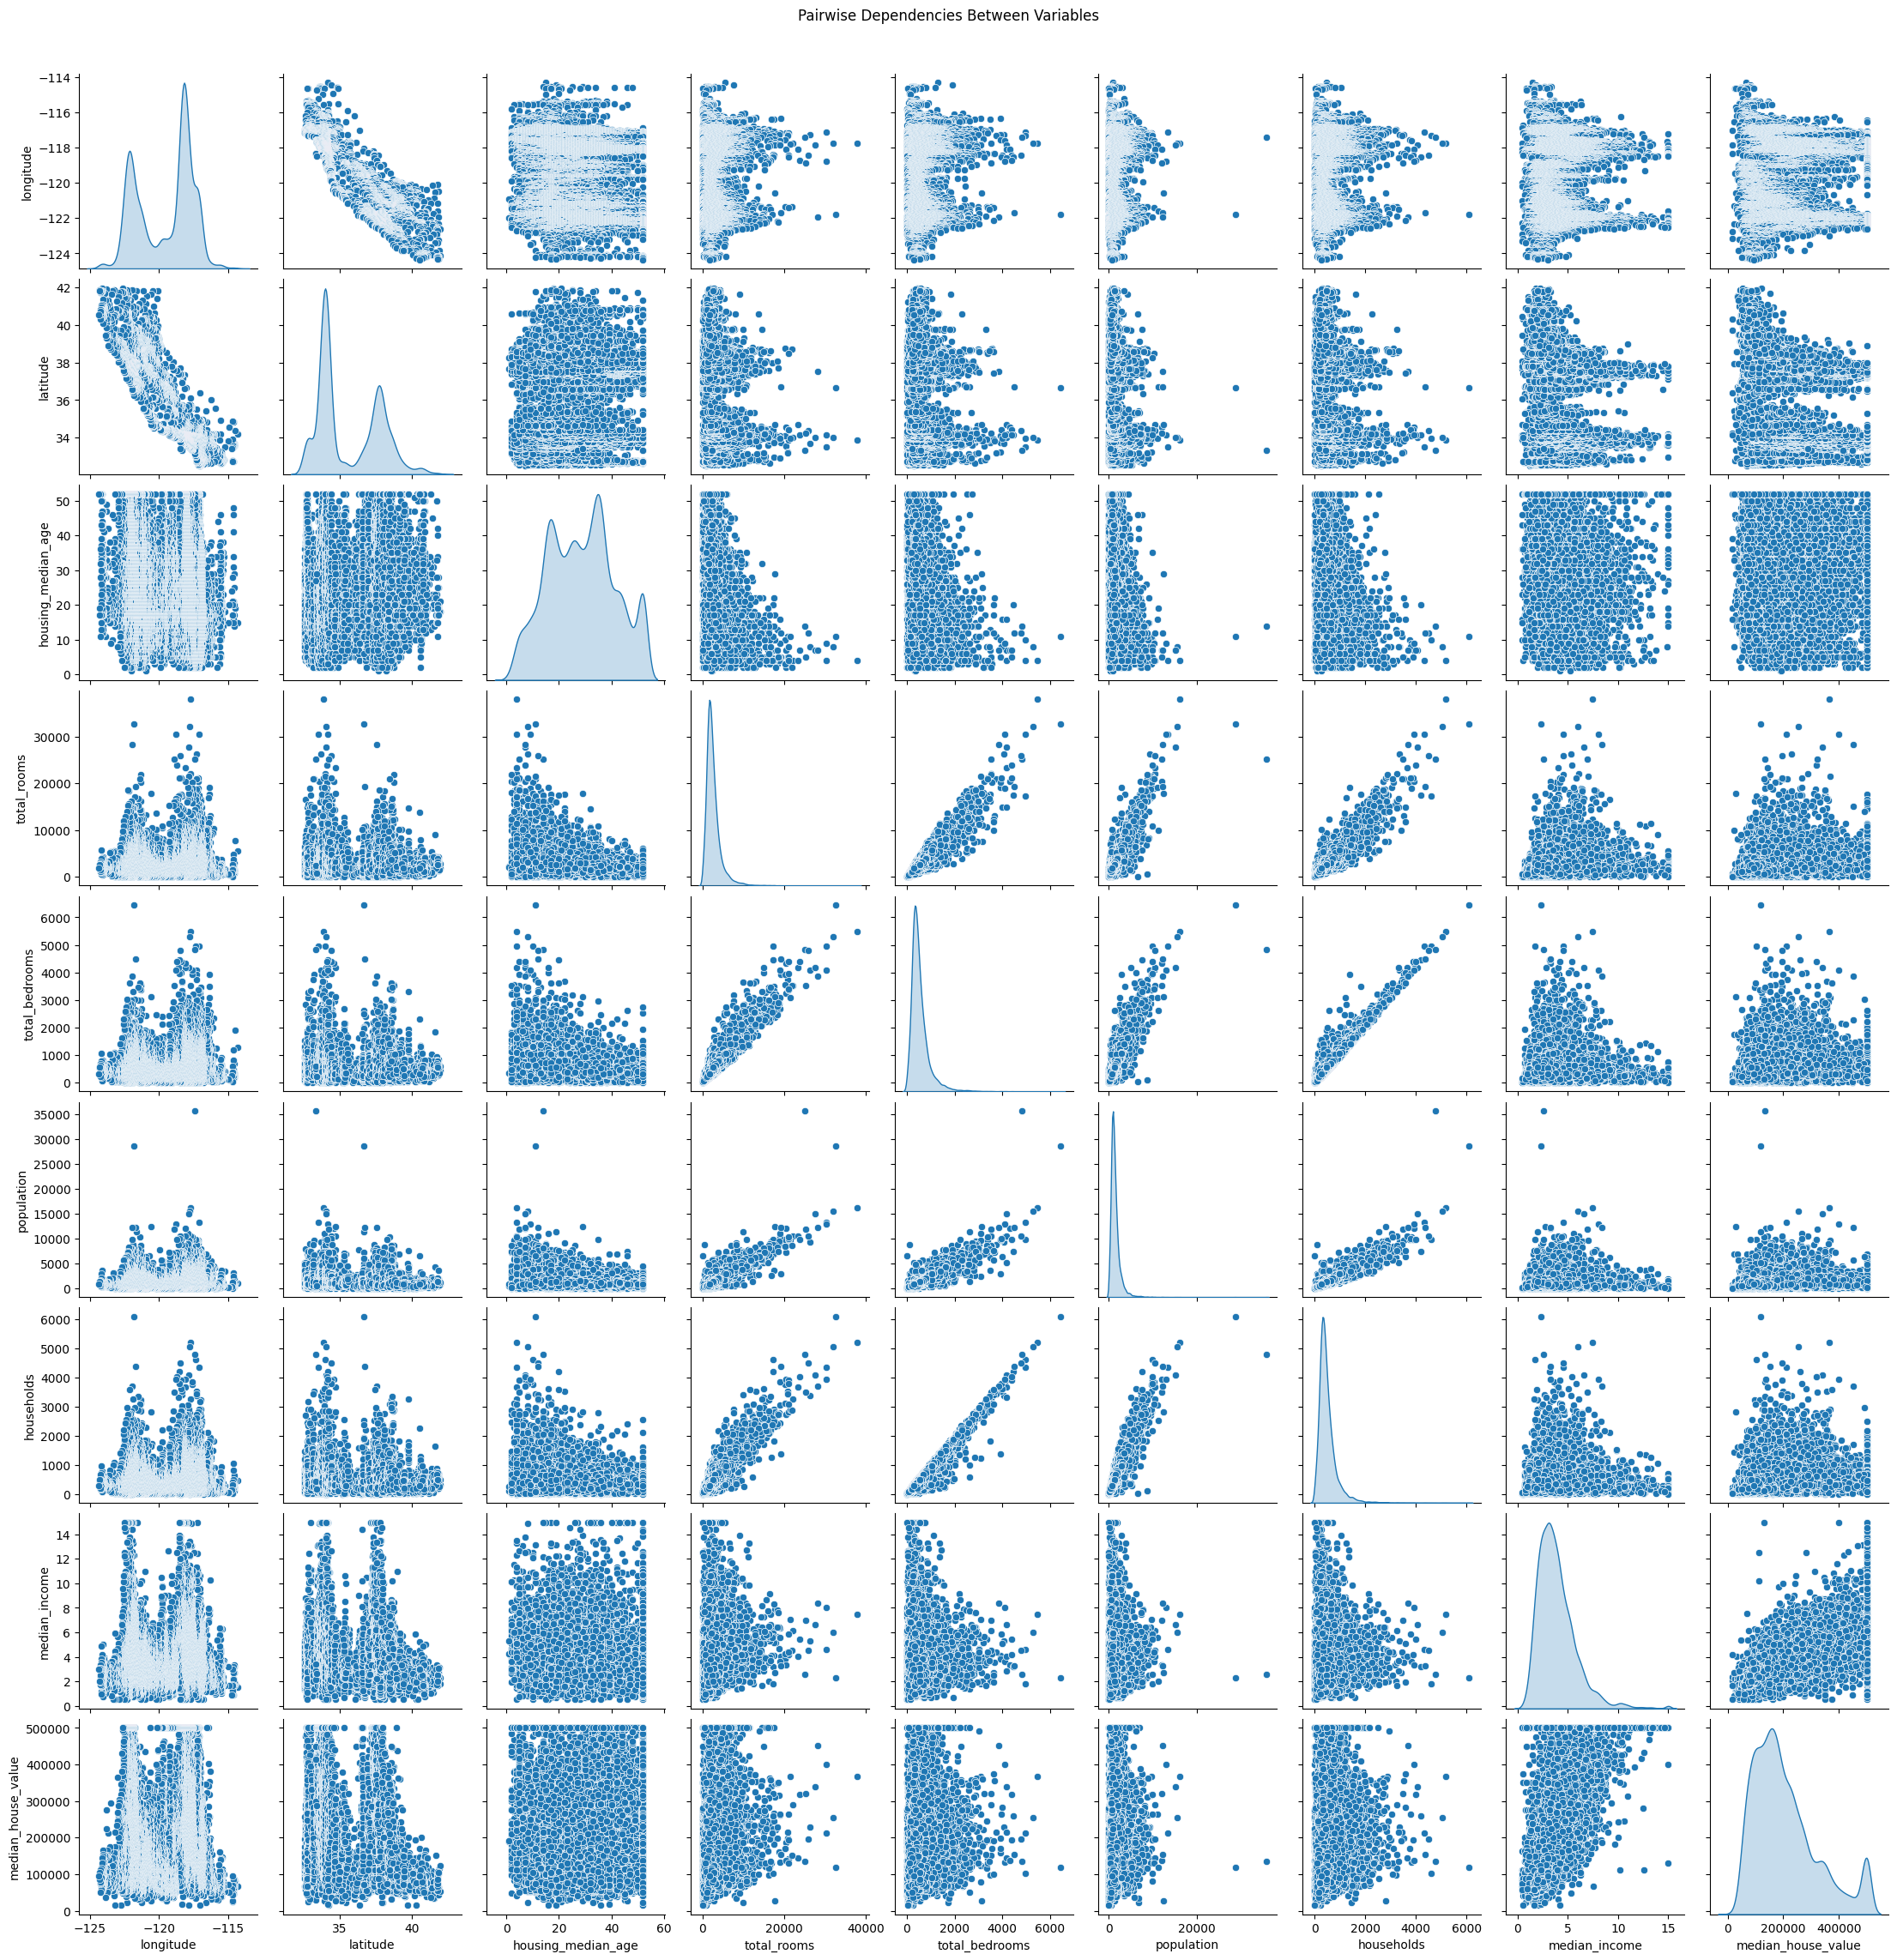

                    Model  R2_Train   R2_Test     MSE_Train      MSE_Test  \
0       Linear Regression  0.639004  0.650111  4.863386e+09  4.677337e+09   
1           Decision Tree  1.000000  0.635804  0.000000e+00  4.868594e+09   
2  Support Vector Machine -0.049666 -0.046465  1.414122e+10  1.398920e+10   
3     k-Nearest Neighbors  0.805120  0.698063  2.625451e+09  4.036309e+09   

      MAE_Train      MAE_Test  
0  51120.605466  49849.818827  
1      0.000000  44744.106176  
2  88720.891567  88334.270245  
3  34519.667515  42596.685882  

Loaded Best Parameters: {'Linear Regression': 'No parameters to tune for basic Linear Regression', 'Decision Tree': {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}, 'Support Vector Machine': {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}, 'k-Nearest Neighbors': {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}}
   Real Values  Linear Regression Predictions  Decision Tree Predictions  \
0     127300.0                   7

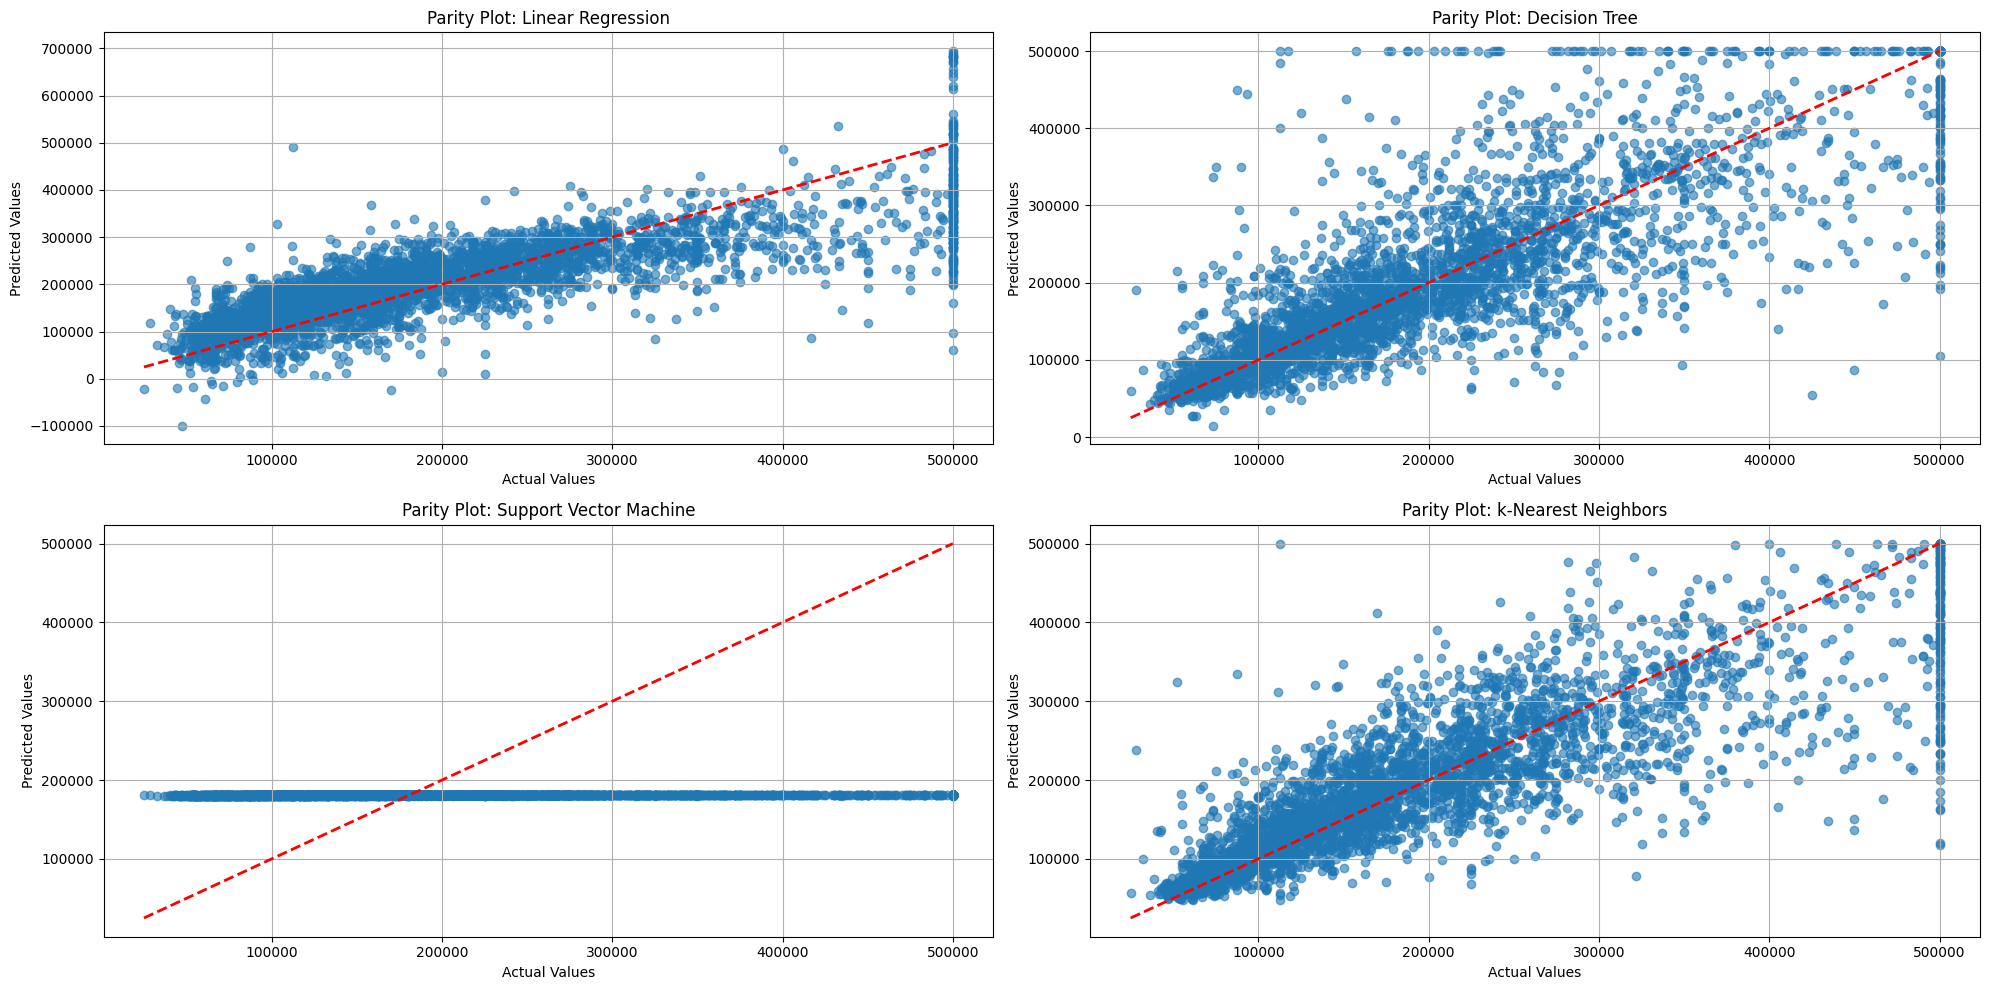

Indexes of observations in each fold:
Fold 1:
Train Indexes: [    0     1     2 ... 16997 16998 16999]
Test Indexes: [   16    17    20 ... 16971 16975 16983]
------------------------------------------------------------
Fold 2:
Train Indexes: [    0     1     2 ... 16997 16998 16999]
Test Indexes: [    3     5    11 ... 16986 16990 16991]
------------------------------------------------------------
Fold 3:
Train Indexes: [    0     1     3 ... 16993 16996 16999]
Test Indexes: [    2     7    14 ... 16995 16997 16998]
------------------------------------------------------------
Fold 4:
Train Indexes: [    2     3     4 ... 16997 16998 16999]
Test Indexes: [    0     1     9 ... 16982 16988 16989]
------------------------------------------------------------
Fold 5:
Train Indexes: [    0     1     2 ... 16995 16997 16998]
Test Indexes: [    4     6     8 ... 16993 16996 16999]
------------------------------------------------------------
Processing Fold 1...
Processing Fold 2...
Processing

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import KFold
import json


drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/house.csv')

#2)
print(f"Number of rows (instances): {df.shape[0]}")
print(f"Number of columns (variables): {df.shape[1]}")
print('-------------------------------------------------------------------------------------------')
#3)
print(df.head())
print('-------------------------------------------------------------------------------------------')
#4)
print("Descriptive statistics for numeric variables:")
print(df.describe())

# Data types and missing values
print("Data types and missing values:")
df.info()
print('-------------------------------------------------------------------------------------------')

#5)

# Define X and Y
X = df.drop(columns=['median_house_value'])  # Independent variables
Y = df['median_house_value']  # Dependent variable


# Display confirmation
print("Independent variables (X):")
print(X.head())

print("\nDependent variable (y):")
print(Y.head())

# Output the shapes of X and Y
print(f"Shape of Independent Variables (X): {X.shape}")
print(f"Shape of Dependent Variable (Y): {Y.shape}")
print('-------------------------------------------------------------------------------------------')
#6)
# Check data types
print("Data types of the variables:")
print(df.dtypes)

#After examining our dataset , there are no categorical variables present...
# Check for missing values
print('-------------------------------------------------------------------------------------------')
#7)
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
#and after running the last two lines we noticed that ther is no NaN vlues in our dataset...

#8)
correlation_matrix = df.corr()
print(correlation_matrix['median_house_value'].sort_values(ascending=False))
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()
#9)
# 2D plots of dependences between each pair of the variables:
sns.pairplot(df, diag_kind="kde", height=2.5)
plt.suptitle("Pairwise Dependencies Between Variables", y=1.02)
plt.show()

#task (2):
# Split the dataset into training and testing sets (80:20 split, random_state=195)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=195)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=195),
    "Support Vector Machine": SVR(),
    "k-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Train the models
for model_name, model in models.items():
    model.fit(X_train_scaled, Y_train)

# Evaluate the models
model_metrics = []
for model_name, model in models.items():
    Y_train_pred = model.predict(X_train_scaled)
    Y_test_pred = model.predict(X_test_scaled)

    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    mae_train = mean_absolute_error(Y_train, Y_train_pred)
    mae_test = mean_absolute_error(Y_test, Y_test_pred)

    model_metrics.append([model_name, r2_train, r2_test, mse_train, mse_test, mae_train, mae_test])

model_metrics_df = pd.DataFrame(model_metrics, columns=["Model", "R2_Train", "R2_Test", "MSE_Train", "MSE_Test", "MAE_Train", "MAE_Test"])
print(model_metrics_df)

# Load Best Parameters from Google Drive
best_params_path = '/content/drive/My Drive/best_params.json'
with open(best_params_path, "r") as f:
    best_params = json.load(f)

print("\nLoaded Best Parameters:", best_params)

# Train optimized models
optimized_models = {
    "Linear Regression": LinearRegression(),  # No need for optimization
    "Decision Tree": DecisionTreeRegressor(**best_params["Decision Tree"], random_state=195),
    "Support Vector Machine": SVR(**best_params["Support Vector Machine"]),
    "k-Nearest Neighbors": KNeighborsRegressor(**best_params["k-Nearest Neighbors"])
}

# Fit all optimized models
for model_name, model in optimized_models.items():
    model.fit(X_train_scaled, Y_train)

# Create DataFrame with real values and predictions
prediction_results = pd.DataFrame({
    "Real Values": Y_test.reset_index(drop=True)  # Reset index for proper alignment
})

# Add predictions for each model
for model_name, model in models.items():
    prediction_results[f"{model_name} Predictions"] = model.predict(X_test_scaled)

# Check the structure of the prediction_results DataFrame
print(prediction_results.head())

# Construct parity plots
plt.figure(figsize=(20, 10))

for i, model_name in enumerate(models.keys(), 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    plt.scatter(prediction_results["Real Values"], prediction_results[f"{model_name} Predictions"], alpha=0.6)
    plt.plot(
        [prediction_results["Real Values"].min(), prediction_results["Real Values"].max()],
        [prediction_results["Real Values"].min(), prediction_results["Real Values"].max()],
        'r--', lw=2
    )  # Perfect prediction line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Parity Plot: {model_name}")
    plt.grid(True)

plt.tight_layout()
plt.show()

## Ensuring proper construction of prediction_results and recalculating errors
# Create a DataFrame for predictions
prediction_results = pd.DataFrame({
    "Real Values": Y_test.reset_index(drop=True)  # Align indices
})

# Add predictions for each model
for model_name, model in models.items():
    prediction_results[f"{model_name} Predictions"] = model.predict(X_test_scaled)

# Calculate prediction errors
prediction_errors = pd.DataFrame({
    "Real Values": prediction_results["Real Values"]
})

for model_name in models.keys():
    prediction_errors[f"{model_name} Error"] = (
        prediction_results["Real Values"] - prediction_results[f"{model_name} Predictions"]
    )

# Calculate error statistics
error_stats = prediction_errors.describe()

# Identify the largest errors for each model
largest_errors = prediction_errors.iloc[:, 1:].abs().idxmax()

# Output results
error_stats, largest_errors, prediction_errors.loc[largest_errors]


from sklearn.model_selection import KFold

# Task 3: K-Fold Cross Validation
# 1) Split data into 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=195)
fold_indices = []

for train_index, test_index in kf.split(X):
    fold_indices.append((train_index, test_index))

# Output the indexes of observations in each split
print("Indexes of observations in each fold:")
for i, (train_index, test_index) in enumerate(fold_indices):
    print(f"Fold {i+1}:")
    print(f"Train Indexes: {train_index}")
    print(f"Test Indexes: {test_index}")
    print("------------------------------------------------------------")

# 2) Build 5 models for each ML method using the best hyperparameters
kf_r2_scores = {model_name: [] for model_name in optimized_models.keys()}  # Store R2 scores for each fold

for i, (train_index, test_index) in enumerate(fold_indices):
    print(f"Processing Fold {i+1}...")

    # Split data for this fold
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    Y_train_kf, Y_test_kf = Y.iloc[train_index], Y.iloc[test_index]

    # Scale data for this fold
    X_train_kf_scaled = scaler.fit_transform(X_train_kf)
    X_test_kf_scaled = scaler.transform(X_test_kf)

    # Train and evaluate models on this fold
    for model_name, model in optimized_models.items():
        model.fit(X_train_kf_scaled, Y_train_kf)  # Train on current fold's training data
        Y_test_kf_pred = model.predict(X_test_kf_scaled)  # Predict on current fold's test data

        # Calculate R2 score
        r2_fold = r2_score(Y_test_kf, Y_test_kf_pred)
        kf_r2_scores[model_name].append(r2_fold)

# 3) Output results for each fold and compute average R2 values
print("\nR2 Scores for Each Fold and Model:")
avg_r2_scores = {}
for model_name, r2_scores in kf_r2_scores.items():
    print(f"\nModel: {model_name}")
    for fold, r2 in enumerate(r2_scores, 1):
        print(f"Fold {fold}: R2 = {r2:.4f}")
    avg_r2_scores[model_name] = np.mean(r2_scores)
    print(f"Average R2 for {model_name}: {avg_r2_scores[model_name]:.4f}")

# 4) Identify the best model based on average R2
best_model = max(avg_r2_scores, key=avg_r2_scores.get)
print(f"\nBest Model: {best_model} with Average R2 = {avg_r2_scores[best_model]:.4f}")
